In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(
    StandardScaler(),
    SimpleImputer(),
    LinearRegression()
)
cvres = cross_validate(model, data_numerical, target, cv=10,
                      return_estimator=True)

In [20]:
estimators = cvres['estimator']
for estimator in estimators:
    print(min(estimator['linearregression'].coef_))

-11452.579552290343
-11783.70227892459
-1.4295175146490703e+18
-12098.283261129447
-11102.150641671704
-12314.284176304804
-12330.15544002845
-11455.220153557728
-1.0947011557081688e+18
-12799.761116414571


In [21]:
estimators = cvres['estimator']
for estimator in estimators:
    print(max(estimator['linearregression'].coef_))

20942.868431280887
20406.395880385673
1.3757952914511089e+18
20243.844165567152
19634.196816747288
22652.887617370125
20200.509719152637
20103.706511184617
1.0307569910955875e+18
19205.720021719266


In [22]:
from sklearn.linear_model import Ridge

model = make_pipeline(
    StandardScaler(),
    SimpleImputer(),
    Ridge()
)
cvres = cross_validate(model, data_numerical, target, cv=10,
                      return_estimator=True)

In [24]:
estimators = cvres['estimator']
for estimator in estimators:
    print(min(estimator['ridge'].coef_))

-11423.498366322336
-11753.764129308795
-12298.726071025078
-12068.04460127148
-11073.611327507875
-12285.826018754145
-12298.904718374259
-11426.365103713471
-13781.812385930025
-12766.640919186624


In [25]:
estimators = cvres['estimator']
for estimator in estimators:
    print(max(estimator['ridge'].coef_))

20868.21547322945
20330.304822267382
19764.802441610627
20169.142445251677
19570.048685168895
22561.85645325139
20127.80561452243
20032.776933178928
17143.069696093302
19143.34269459518


In [30]:
import pandas as pd
est_df = pd.DataFrame([est['ridge'].coef_ for est in estimators], columns=numerical_features)
est_df

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-520.701583,1394.332126,7678.616805,8808.473600,-270.041862,2933.372718,11937.233636,10101.635929,11967.574463,-1560.564037,...,3343.513054,20868.215473,-1863.829101,4547.323218,2195.315556,-2103.032226,1697.554110,1685.286338,-2025.446524,378.426504
1,-1106.390251,1148.033611,6637.364106,8564.803531,-70.181223,3088.401413,11956.668476,9933.700075,11842.692863,-2770.486291,...,3229.806106,20330.304822,-2322.593475,5400.901026,1700.773840,-3120.947795,883.080283,741.077136,-1787.552552,297.095592
2,-164.131019,493.241149,6863.183656,8498.169638,-658.138989,3238.483429,11859.175790,9363.084762,11954.578610,-1691.420893,...,3340.427154,19764.802442,-1225.927176,5533.880276,1812.478788,-2642.216872,1068.411276,1956.094508,-1761.939270,-1050.605437
3,-264.054192,1969.896672,7844.293345,7968.015720,-561.593210,2709.265869,10989.175122,11243.761722,12776.985308,-1825.006931,...,2145.289789,20169.142445,-1942.770287,4447.464370,3030.373856,-2750.176555,828.758696,1596.117241,-2177.640294,303.754882
4,474.903647,1383.137537,6160.174281,7862.675825,218.595802,3240.930715,11408.726005,8666.073247,11417.081392,-1910.396683,...,3637.008447,19570.048685,323.380776,3937.757650,1974.189303,-2466.087272,982.724715,1960.197678,-1609.006773,-6.524727
5,360.275221,1282.071621,6223.725358,8604.862800,-168.751185,2228.279835,11084.107526,10856.380684,12300.697829,-1488.050294,...,3413.459169,22561.856453,-3181.355643,4834.945815,2113.366440,-2525.817045,1051.796131,1376.473105,-2243.213574,273.947322
6,-536.051289,1808.352973,6978.421816,8121.604418,358.864078,3629.677299,12189.544187,8743.927722,12781.923455,-1439.194782,...,3061.677883,20127.805615,-947.479851,5792.154742,2543.634566,-2578.124762,1548.486125,1958.471899,-1807.166903,252.531717
7,-682.275241,1324.235961,6980.907126,8080.332463,-413.337755,2405.984294,10672.328896,10822.520913,11239.294498,-1279.923974,...,3758.108015,20032.776933,-641.040137,5401.290754,2065.459702,-3392.058947,1050.045951,1612.453015,-1885.455252,313.416997
8,3114.054017,2600.372186,6481.605604,11098.537210,-619.642231,4174.361863,15692.315254,7710.158127,13643.834636,-1735.528228,...,2270.885092,11610.608799,4623.099297,3289.713416,2028.025791,-3111.626281,32.716090,1282.097780,70.601154,608.205089
9,5.296663,1678.405759,6967.519765,8134.059358,199.057810,3133.183524,11688.534316,9579.342056,12095.367094,-1482.704121,...,2670.864975,19143.342695,-77.193781,4445.513280,1494.094884,-2662.894482,294.511865,2172.625290,-2417.383218,102.502436


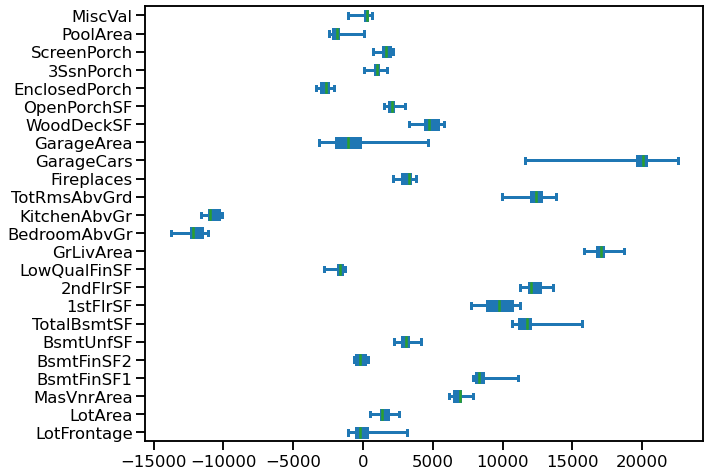

In [34]:
_ = est_df.plot.box(figsize=(10, 8), vert=False)

In [40]:
data_num_ex = data_numerical.drop(columns='GarageCars')
data_num_ex

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,8,0,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,6,1,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,6,1,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,7,1,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,9,1,836,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,7,1,460,0,40,0,0,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,7,2,500,349,0,0,0,0,0,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,9,2,252,0,60,0,0,0,0,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,5,0,240,366,0,112,0,0,0,0


In [37]:
model = make_pipeline(
    StandardScaler(),
    SimpleImputer(),
    Ridge()
)
cvres = cross_validate(model, data_num_ex, target, cv=10,
                      return_estimator=True)

In [41]:
estimators = cvres['estimator']
est_df = pd.DataFrame([est['ridge'].coef_ for est in estimators], columns=data_num_ex.columns)
est_df

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-975.305475,1210.995066,8039.336004,8340.087942,-446.559096,3714.067929,12169.019016,9635.240079,12503.579879,-2411.888510,...,13619.860422,4526.220464,15584.005978,4991.163011,1710.613695,-3052.239536,1898.540022,1827.259656,-2586.416664,-83.583261
1,-1668.605830,734.226498,6933.662574,8032.306872,-141.666374,3748.277038,12033.189343,9571.780731,12205.377523,-3665.077745,...,14485.944377,4522.849315,14845.150842,5788.647682,1185.214633,-3984.819082,964.435733,676.406258,-2313.456524,-125.957789
2,-610.010075,142.317191,7197.096167,7818.897375,-818.047145,3971.871387,11835.399465,9182.825575,12535.901479,-2557.087292,...,13885.878671,4581.103994,15368.111300,5956.528931,1427.170159,-3623.851859,1202.475369,1911.348877,-2269.952773,-1525.742763
3,-604.414708,1786.837671,8268.970900,7265.123436,-774.604735,3365.331188,10838.626629,11011.524410,13260.474528,-2661.983424,...,11595.112771,3483.093904,15055.167085,4806.159116,2868.668871,-3678.013170,910.327609,1455.046521,-2725.794720,-54.509011
4,-174.802927,1395.623280,6301.383212,7297.166444,89.255181,3966.313921,11512.255323,8306.459573,12040.724021,-2712.171432,...,13618.528203,4897.655951,16822.517791,4170.308861,1562.378178,-3345.575247,1110.395730,1879.560984,-2131.883257,-362.343144
5,-203.926797,1051.045493,6511.871680,8145.687399,-504.545649,3011.048314,11254.872385,10447.277823,12749.483818,-2430.090652,...,12046.607453,4807.259368,15835.584433,4998.580611,1575.651009,-3552.628353,1135.957154,1215.274753,-3034.381896,-112.059877
6,-1176.222506,1661.889870,7172.038424,7613.113653,244.491904,4341.600314,12328.191294,8328.045151,13277.388246,-2164.592724,...,13488.027844,4264.786942,16202.456341,6151.596874,2044.632560,-3509.296096,1614.625277,1985.974169,-2328.342760,-143.096604
7,-1289.996935,1113.940906,7279.533389,7571.460972,-625.248559,3148.920520,10807.637946,10334.963737,11780.115124,-2026.568988,...,13950.303479,5085.432465,16325.458845,5704.077559,1635.840072,-4240.255188,1309.257289,1584.763286,-2414.422774,-38.778955
8,3132.597825,2462.637081,6618.533146,11009.304768,-732.283038,4569.115439,15975.371798,7572.174661,14182.679128,-2198.142563,...,13541.912184,2942.558984,14112.208270,3448.581657,1671.438367,-3707.316934,52.587005,1210.697738,134.029435,381.266089
9,-246.554681,1473.984739,7268.453275,7598.377644,107.393272,3729.994501,11692.460536,9288.208850,12727.034561,-2198.906302,...,15222.802846,3832.729998,15970.816547,4826.353048,1073.186079,-3389.802524,354.399144,2093.596088,-3198.525229,-264.392964


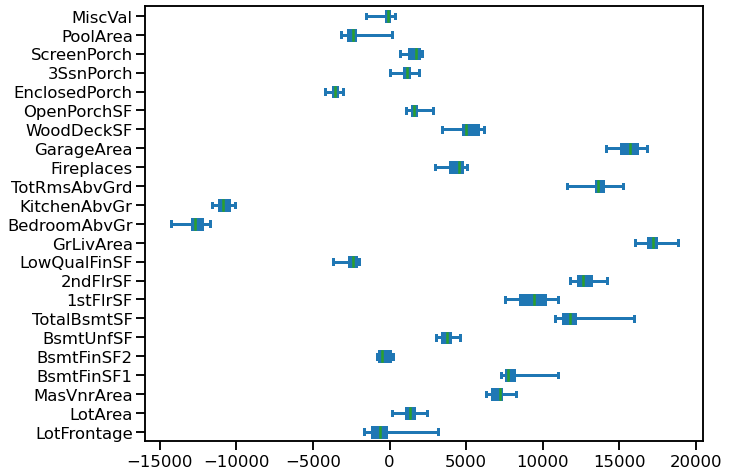

In [42]:
_ = est_df.plot.box(figsize=(10, 8), vert=False)

In [67]:
import numpy as np
from sklearn.linear_model import RidgeCV

model = make_pipeline(
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=np.logspace(-1, 3, num=30))
)
cvres = model.fit(data_num_ex, target)

In [68]:
cvres['ridgecv'].coef_

array([  754.9206363 ,  1661.87301004,  7787.59170923,  7238.10786102,
        -586.60998412,  3410.23562855, 10744.17348474,  8900.91933053,
        9867.56648477, -1848.61276349, 14574.42490098, -6687.52117443,
       -8297.53597298,  9683.42331609,  5828.1480649 , 14295.37437142,
        5440.09450929,  3142.29162782, -3105.25793485,  1039.80278199,
        1509.72658351, -1536.3539845 ,  -257.09747861])

In [69]:
cvres['ridgecv'].alpha_

385.6620421163472

In [70]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [71]:
data

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [75]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
cvres = cross_validate(model, data, target, cv=10,
                      return_estimator=True)

In [77]:
cvres['test_score']

array([0.79856704, 0.79283521, 0.79668305, 0.80487305, 0.80036855,
       0.79914005, 0.79750205, 0.7993448 , 0.80507781, 0.80405405])

In [78]:
from sklearn.dummy import DummyClassifier

model = make_pipeline(
    StandardScaler(),
    DummyClassifier(strategy='most_frequent')
)
cvres = cross_validate(model, data, target, cv=10,
                      return_estimator=True)

In [79]:
cvres['test_score']

array([0.76069601, 0.76069601, 0.76085176, 0.76085176, 0.76085176,
       0.76064701, 0.76064701, 0.76064701, 0.76064701, 0.76064701])

In [80]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
cvres = cross_validate(model, data, target, cv=10,
                      return_estimator=True)

In [81]:
est = cvres['estimator']

In [84]:
for e in est:
    print(e['logisticregression'].coef_)

[[0.52204276 2.4667774  0.30602977 0.53963505]]
[[0.52606692 2.40653282 0.30817766 0.54182433]]
[[0.52425661 2.45592287 0.30812359 0.54384342]]
[[0.52037496 2.45048201 0.30916996 0.53459728]]
[[0.51925928 2.51201042 0.30424291 0.54671495]]
[[0.52173216 2.4416315  0.30401707 0.54128619]]
[[0.52023528 2.47372277 0.30689298 0.53637405]]
[[0.52395804 2.44532129 0.30832579 0.53825271]]
[[0.51645436 2.40508701 0.30839363 0.53512121]]
[[0.51673694 2.45048914 0.30139428 0.53553169]]


In [85]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [150]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder

numerical_columns_selector = make_column_selector(dtype_include=np.number)
categorical_columns_selector = make_column_selector(dtype_include=object)
numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

preprocessor = ColumnTransformer(
    (('numerical', StandardScaler(), numerical_columns),
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'), categorical_columns))
)

model = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=500)
)
cvres = cross_validate(model, data, target, cv=10,
                      return_estimator=True)

In [151]:
cvres['test_score']

array([0.85261003, 0.85076766, 0.85012285, 0.84889435, 0.84889435,
       0.8466421 , 0.8548321 , 0.8511466 , 0.85872236, 0.8523751 ])

In [141]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["onehotencoder"]
                             .get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns

In [152]:
est = cvres['estimator']

In [153]:
est_df = pd.DataFrame([e['logisticregression'].coef_[0] for e in est], columns=feature_names)
est_df

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,capital-gain,capital-loss,hours-per-week
0,0.331831,2.369085,0.257322,0.354368,-0.127614,0.694464,0.008338,-0.171481,0.181467,0.335733,...,0.450211,0.000191,-0.027146,-0.885840,0.115777,-0.426483,-0.633911,0.363977,-0.630692,0.687812
1,0.337511,2.305924,0.261051,0.355629,-0.093742,0.678790,0.074624,-0.172802,0.205632,0.338732,...,0.971547,-0.059596,-0.549385,-0.917860,0.095145,-0.426736,-0.451587,0.306991,-0.727509,0.467397
2,0.339525,2.344743,0.261197,0.358507,-0.136693,0.688008,0.050628,-0.126047,0.224692,0.379539,...,0.260692,-0.117120,-0.407483,-0.899562,0.052070,-0.488682,-0.608662,0.378056,-0.851905,0.819488
3,0.336756,2.357725,0.259316,0.352584,-0.169872,0.643139,0.044752,-0.160184,0.169013,0.310212,...,0.796862,-0.004999,-0.505585,-0.884184,0.099828,-0.419014,-0.394176,0.319465,-0.859745,0.759019
4,0.333128,2.411833,0.263996,0.358082,-0.169224,0.685401,0.051125,-0.165644,0.183741,0.310677,...,0.686771,-0.190672,-0.529835,-0.713228,0.242501,-0.509515,-0.649244,0.304185,-0.825888,0.433977
5,0.344134,2.349249,0.254146,0.360793,-0.143203,0.682930,0.020654,-0.166788,0.193595,0.361833,...,0.807774,0.017125,-0.539475,-0.900996,0.084779,-0.509545,-0.579670,0.332592,-0.712018,0.467594
6,0.334716,2.354531,0.256205,0.355006,-0.140722,0.694890,0.031085,-0.173388,0.187879,0.322970,...,0.639324,0.106314,-0.441515,-1.229640,-0.057558,-0.450207,-0.871767,0.349575,-0.745564,0.682581
7,0.337984,2.343484,0.262578,0.350936,-0.152309,0.633266,0.041606,-0.174956,0.150398,0.282016,...,-0.155151,-0.678302,-0.924159,0.027105,-0.541359,-0.626156,0.353201,-0.687769,0.757011,NaN
8,0.328399,2.292957,0.264365,0.352396,-0.151163,0.654030,0.037690,-0.172363,0.169376,0.329239,...,0.742311,-0.006901,-0.708203,-0.810789,0.168689,-0.498848,-0.497696,0.329848,-0.975300,0.665207
9,0.337657,2.339733,0.256972,0.352241,-0.229918,0.626976,0.000541,-0.028197,0.153494,0.289331,...,0.850976,0.068337,-0.634371,-0.836147,0.095822,-0.462040,-0.944907,0.350292,-0.730511,0.883122


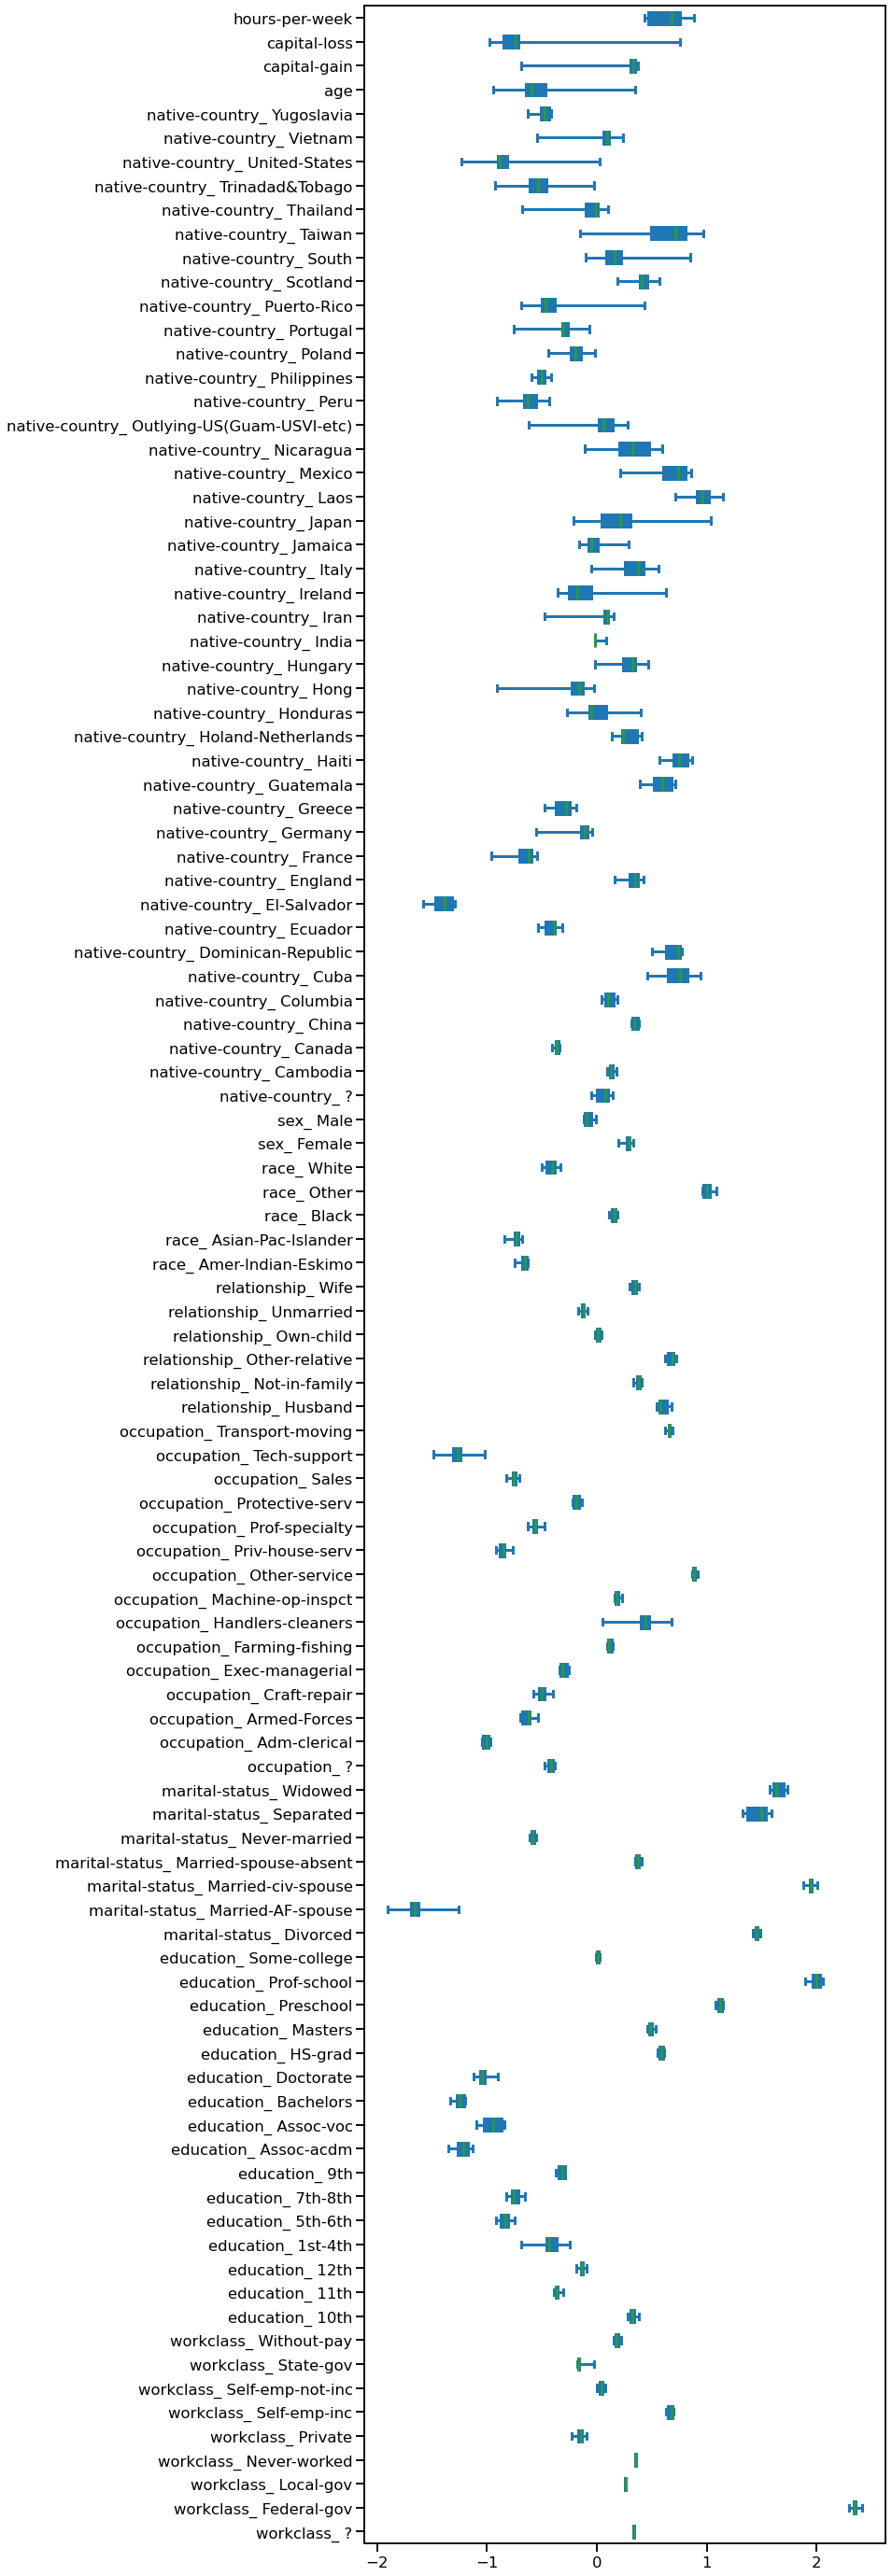

In [112]:
_ = est_df.plot.box(figsize=(10, 50), vert=False)

In [154]:
est_df.std()

workclass_ ?                  0.004383
workclass_ Federal-gov        0.032568
workclass_ Local-gov          0.003478
workclass_ Never-worked       0.003212
workclass_ Private            0.035139
                                ...   
native-country_ Yugoslavia    0.061587
age                           0.354065
capital-gain                  0.325003
capital-loss                  0.497004
hours-per-week                0.162378
Length: 106, dtype: float64

In [124]:
est_df["hours-per-week"]

0    0.687812
1    0.467397
2    0.819488
3    0.759019
4    0.433977
5    0.467594
6    0.682581
7         NaN
8    0.665207
9    0.883122
Name: hours-per-week, dtype: float64

In [126]:
est_df["native-country_ Columbia"]

0    0.045082
1    0.109876
2    0.099311
3    0.088797
4    0.047744
5    0.112624
6    0.165106
7    0.184951
8    0.170789
9    0.070657
Name: native-country_ Columbia, dtype: float64

In [127]:
est_df["workclass_ ?"]

0    0.331831
1    0.337511
2    0.339525
3    0.336756
4    0.333128
5    0.344134
6    0.334716
7    0.337984
8    0.328399
9    0.337657
Name: workclass_ ?, dtype: float64

In [130]:
est_df["native-country_ ?"]

0   -0.004951
1    0.024138
2   -0.045881
3    0.093485
4    0.147366
5    0.140532
6    0.111568
7    0.071812
8    0.083505
9   -0.018340
Name: native-country_ ?, dtype: float64

In [131]:
est_df["capital-gain"]

0    0.363977
1    0.306991
2    0.378056
3    0.319465
4    0.304185
5    0.332592
6    0.349575
7   -0.687769
8    0.329848
9    0.350292
Name: capital-gain, dtype: float64

In [133]:
est_df["education_ Doctorate"]

0   -0.982093
1   -1.063676
2   -1.064599
3   -0.902947
4   -1.050384
5   -1.104281
6   -1.015212
7   -1.031896
8   -1.024825
9   -1.117762
Name: education_ Doctorate, dtype: float64

In [155]:
model = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=500, C=0.5)
)
cvres = cross_validate(model, data, target, cv=10,
                      return_estimator=True)

In [146]:
cvres['test_score']

array([0.85301945, 0.85138178, 0.8503276 , 0.84889435, 0.84848485,
       0.84725635, 0.8548321 , 0.8507371 , 0.85933661, 0.8523751 ])

In [156]:
est = cvres['estimator']

In [157]:
est_df = pd.DataFrame([e['logisticregression'].coef_[0] for e in est], columns=feature_names)
est_df

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,capital-gain,capital-loss,hours-per-week
0,0.329953,2.355705,0.256784,0.353916,-0.182829,0.675934,-0.006146,-0.090429,0.164180,0.318222,...,0.355565,-0.029504,-0.031977,-0.797772,0.107231,-0.325637,-0.483015,0.335884,-0.542193,0.522622
1,0.335318,2.292890,0.260562,0.355099,-0.164591,0.640378,0.039652,-0.088868,0.168209,0.301449,...,0.805647,-0.081932,-0.432929,-0.826367,0.085023,-0.319426,-0.342812,0.279357,-0.628470,0.349440
2,0.337534,2.331641,0.260754,0.357950,-0.181384,0.651596,0.018114,-0.086081,0.189487,0.344403,...,0.189815,-0.133877,-0.312223,-0.801815,0.052810,-0.368740,-0.450562,0.356172,-0.714971,0.625536
3,0.334634,2.345486,0.258908,0.352131,-0.212553,0.631454,0.035642,-0.086190,0.157818,0.299355,...,0.669316,-0.022802,-0.393826,-0.782318,0.092338,-0.312550,-0.295309,0.299586,-0.724817,0.585290
4,0.330930,2.398194,0.263410,0.357680,-0.222968,0.664563,0.034058,-0.082157,0.164475,0.292130,...,0.570212,-0.202444,-0.418777,-0.638469,0.215860,-0.379731,-0.491285,0.280484,-0.697664,0.327519
5,0.342131,2.336017,0.253816,0.360015,-0.197297,0.659734,0.001076,-0.088355,0.171694,0.340329,...,0.679546,-0.010374,-0.424766,-0.799236,0.078158,-0.393128,-0.440763,0.308971,-0.599492,0.350520
6,0.332624,2.341086,0.255761,0.354277,-0.199139,0.668469,0.008100,-0.088714,0.162299,0.297248,...,0.528649,0.072187,-0.345637,-1.088299,-0.042027,-0.339287,-0.628370,0.324314,-0.637146,0.525854
7,0.335878,2.329856,0.262054,0.350288,-0.201330,0.620643,0.031316,-0.087462,0.138853,0.271064,...,-0.167077,-0.510787,-0.815292,0.033132,-0.408169,-0.474708,0.330600,-0.580737,0.577704,NaN
8,0.326441,2.280334,0.263820,0.351886,-0.202553,0.638164,0.024009,-0.087401,0.154092,0.314382,...,0.621597,-0.034394,-0.543726,-0.723092,0.154224,-0.385669,-0.372623,0.303852,-0.806473,0.505641
9,0.335733,2.326696,0.256423,0.351484,-0.252505,0.604642,-0.017843,-0.013675,0.132199,0.269142,...,0.708443,0.024655,-0.489021,-0.749318,0.083884,-0.357302,-0.687012,0.312790,-0.630586,0.662030


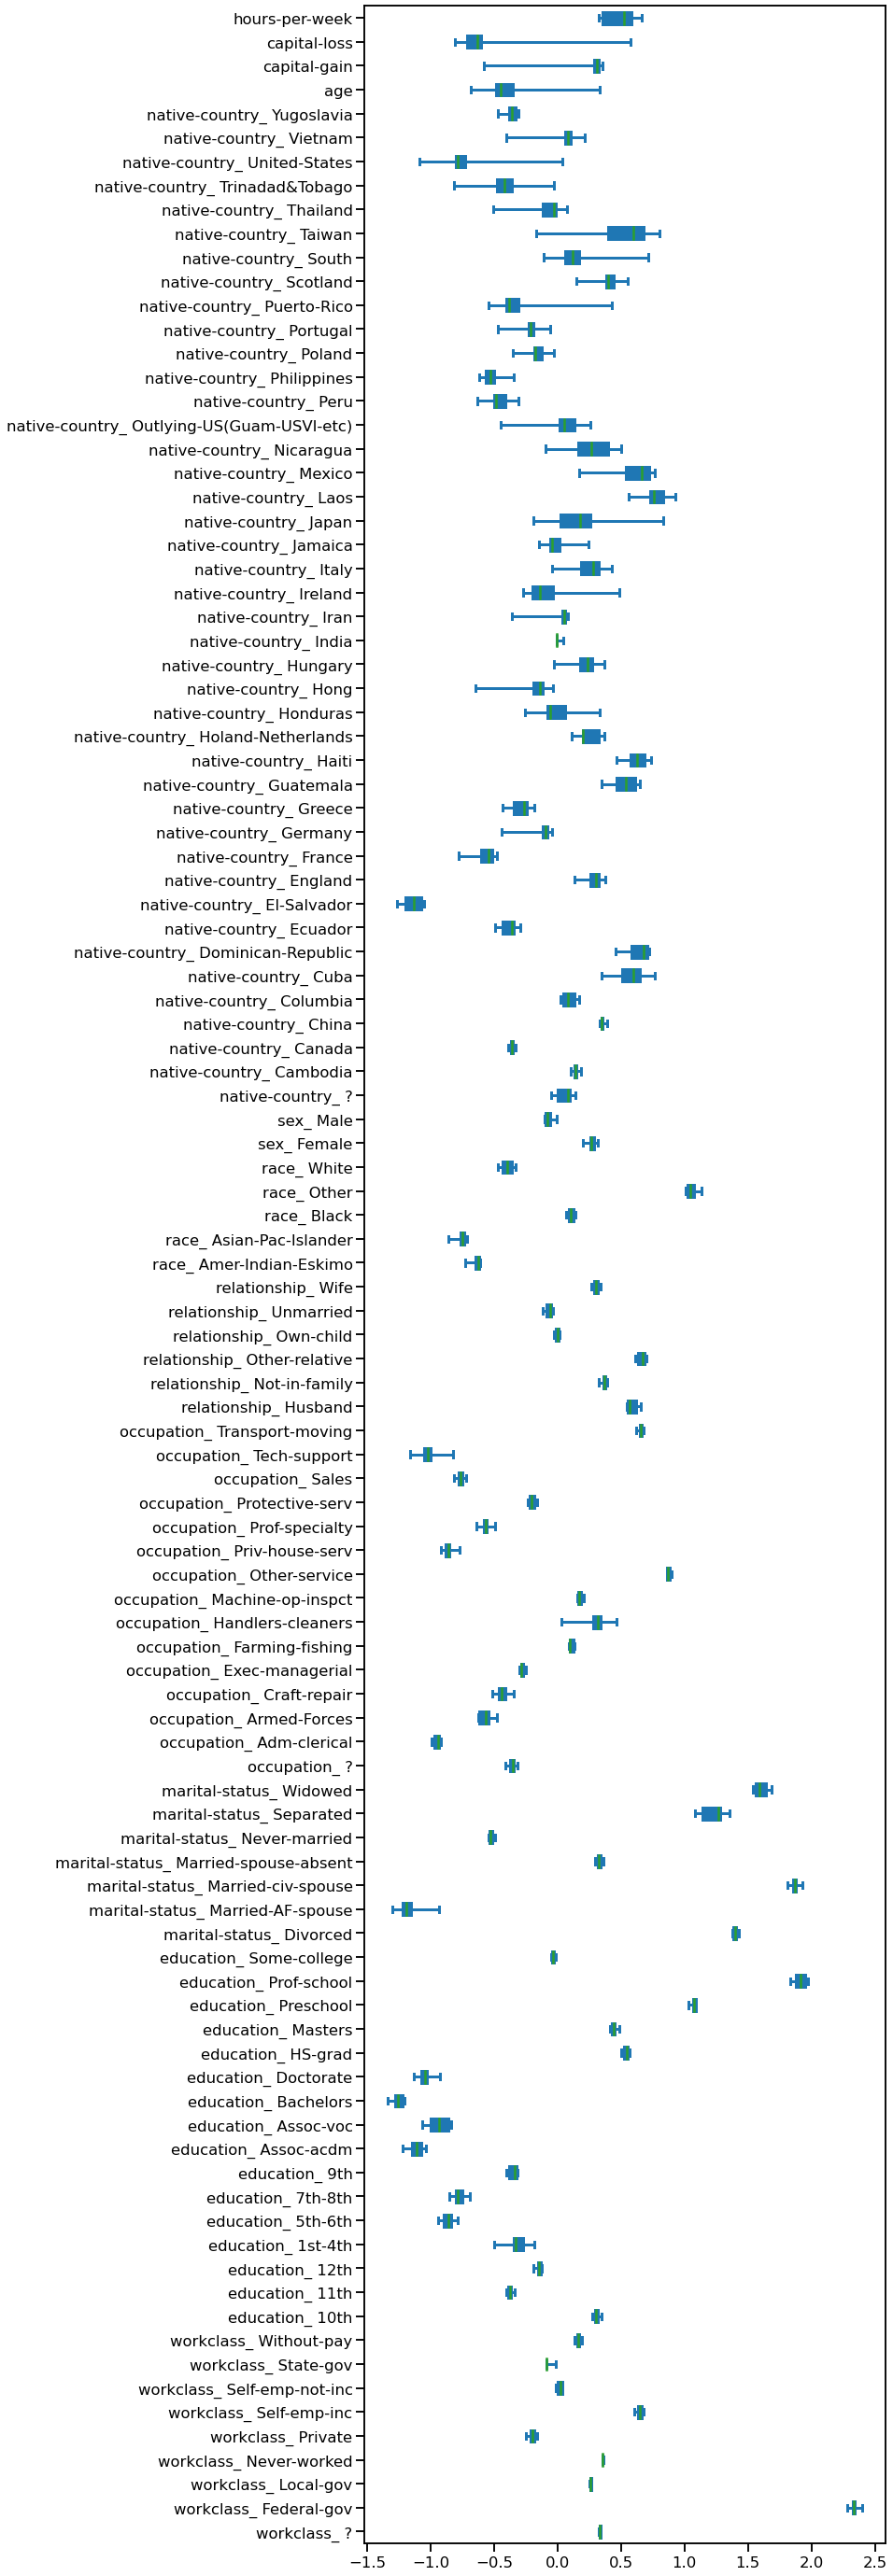

In [138]:
_ = est_df.plot.box(figsize=(10, 50), vert=False)

In [158]:
est_df.std()

workclass_ ?                  0.004371
workclass_ Federal-gov        0.032359
workclass_ Local-gov          0.003430
workclass_ Never-worked       0.003205
workclass_ Private            0.024322
                                ...   
native-country_ Yugoslavia    0.047818
age                           0.279046
capital-gain                  0.283051
capital-loss                  0.399849
hours-per-week                0.125015
Length: 106, dtype: float64